# Social Computing/Social Gaming - Summer 2025
# Exercise Sheet 6 - Introduction to Game Theory

## Task 6.1 - Competitive Games (Axelrod Tournament)

Competitive games involve situations where individuals or entities compete against each other to achieve the best outcome.

One example is the **prisoner's dilemma**.
The prisoner's dilemma is a game theory thought experiment that involves two rational agents, each of whom can cooperate for mutual benefit or betray their partner ("defect") for individual reward.

The prisoner's dilemma models many real-world situations involving strategic behavior. In casual usage, the label "prisoner's dilemma" may be applied to any situation in which two entities could gain important benefits from cooperating or suffer from failing to do so, but find it difficult or expensive to coordinate their activities.

Two prisoners are separated into individual rooms and cannot communicate with each other. It is assumed that both prisoners understand the nature of the game, have no loyalty to each other, and will have no opportunity for retribution or reward outside of the game. The normal game is shown below:

This leads to four different possible outcomes for prisoners A and B:

|                 | B Stays Silent            | B Testifies               |
|-----------------|---------------------------|---------------------------|
| **A Stays Silent**  | Both serve 1 year         | A serves 3 years, B goes free |
| **A Testifies**     | A goes free, B serves 3 years | Both serve 2 years      |


Regardless of what the other decides, each prisoner gets a higher reward by betraying the other ("defecting").

Defection always results in a better payoff than cooperation, so it is a strictly dominant strategy for both players. Mutual defection is the only strong [Nash equilibrium](https://pub.dss.in.tum.de/brandt-research/nash.pdf)[4] in the game. Since the collectively ideal result of mutual cooperation is irrational from a self-interested standpoint, this Nash equilibrium is not [Pareto efficient](https://economics.utoronto.ca/osborne/2x3/tutorial/PEFRM.HTM)[5].



### [Axelrod's Tournament](https://cs.stanford.edu/people/eroberts/courses/soco/projects/1998-99/game-theory/axelrod.html) [1]
In 1980, Robert Axelrod, professor of political science at the University of Michigan, held a tournament of various strategies for the prisoner's dilemma. In the tournament, programs played games against each other and themselves repeatedly. Each strategy specified whether to cooperate or defect based on the previous moves of both the strategy and its opponent. 

The four different outcomes for players A and B in a default Axelrod Tournament are:

|                   | B Cooperates            | B Defects           |
|-------------------|-------------------------|---------------------|
| **A Cooperates**  | Both receive 3 points   | B receives 5 points |
| **A Defects**     | A receives 5 points     |Both receive 1 point |

Some of the strategies submitted were:

- Always defect: This strategy defects on every turn. This is what game theory advocates. It is the safest strategy since it cannot be taken advantage of. However, it misses the chance to gain larger payoffs by cooperating with an opponent who is ready to cooperate.
- Always cooperate: This strategy does very well when matched against itself. However, if the opponent chooses to defect, then this strategy will do badly.
- Random: The strategy cooperates 50% of the time.
All of these strategies are prescribed in advance. Therefore, they cannot take advantage of knowing the opponent's previous moves and figuring out its strategy.

The winner of Axelrod's tournament was the TIT FOR TAT strategy. The strategy cooperates on the first move, and then does whatever its opponent has done on the previous move.

It must be realized that there really is no "best" strategy for the prisoner's dilemma. Each individual strategy will work best when matched against a "worse" strategy. In order to win, a player must figure out his opponent's strategy and then pick a strategy that is best suited for the situation.

#### First things first. Install all what you need for the sheet.

In [53]:
# Import all the libraries
try:
    import axelrod as axl
except ImportError:
    print("Axelrod is not installed. Installing now...")
    !pip install axelrod
    import axelrod as axl

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import itertools
import re
from pandas.api.types import CategoricalDtype
from collections import Counter, defaultdict
from axelrod.strategy_transformers import *

#### a) Simulate an Axelrod tournament

Simulate a tournament using strategies from the Axelrod library for iterated prisoner's dilemma games, analyze the results, and visualize the performance of each strategy.

Initialize the first tournament strategies (`axl.axelrod_first_strategies`), create a tournament with such strategies, play the tournament and get the summary of it.

*Hint: you can make use of the Axelrod library [documentation](https://axelrod.readthedocs.io/en/stable/index.html?highlight=axelrod)[6] to help you navigate*

Analysing: 100%|██████████| 25/25 [00:00<00:00, 233.78it/s]


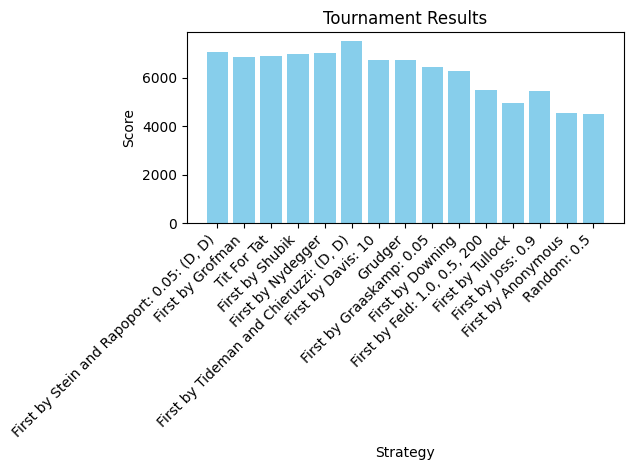

[7070, 6859, 6907, 6966, 7042, 7501, 6723, 6731, 6443, 6265, 5482, 4970, 5458, 4546, 4527]


In [54]:
#Simulate an Axelrod tournament
strategies = [s() for s in axl.axelrod_first_strategies]
tournament =axl.Tournament(strategies)
results = tournament.play()
summary = results.summarise()

ranked_names = results.ranked_names
scores = results.scores

# Extract the scores for the last repetition of each strategy
last_scores = [score[-1] for score in scores]

# Plot the bar graph
plt.bar(ranked_names, last_scores, color='skyblue')
plt.xlabel('Strategy')
plt.ylabel('Score')
plt.title('Tournament Results')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the scores
print(last_scores)

#### b) Custom strategy for the tournament

Define a `MyStrategy` for the tournament, append it to the existing strategies and replay the tournament with new set of strategies to see how it performs in comparison!
Please provide a small explanation of how your strategy should behave. You may use any strategy you want, it can alway Defect (`D`) or Cooperate (`C`) or you can get creative.

Analysing: 100%|██████████| 25/25 [00:00<00:00, 158.57it/s]


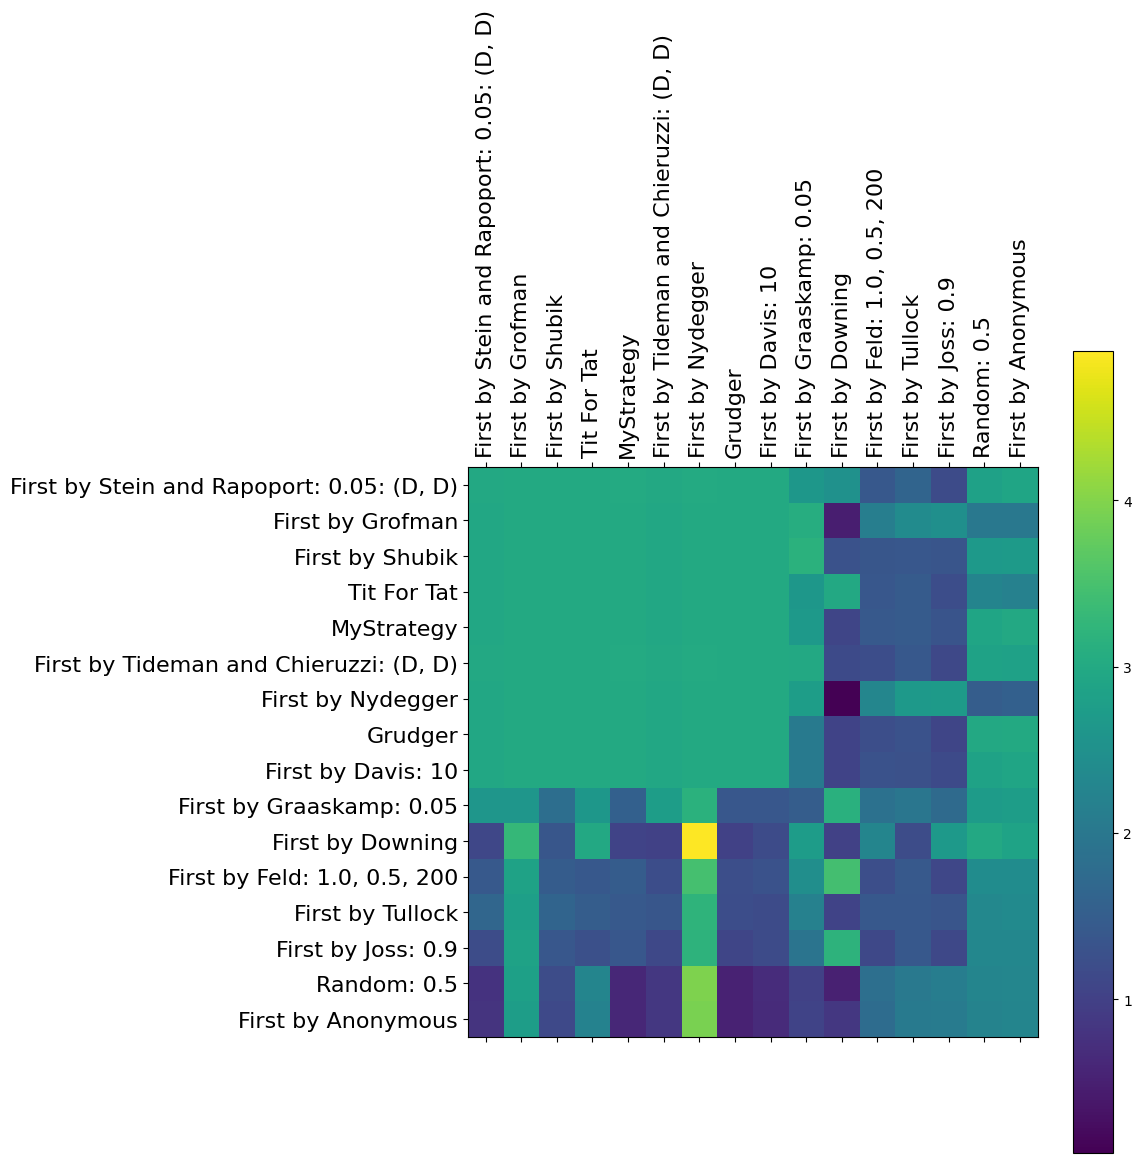

In [55]:
class MyStrategy(Player):
    """
    Describe how your strategy behaves
    My strategy is called "Fool Me Trice, Pay the Price":
    - If the opponent has betrayed 2 times or less, cooperate.
    - If the opponent has betrayed more than 2 times, always betray.
    """

    name = 'MyStrategy'
    classifier = {
        'memory_depth': float('inf'),
        'stochastic': False,
        'inspects_source': False,
        'manipulates_source': False,
        'manipulates_state': False
    }

    def strategy(self, opponent):
        betrayal = list(opponent.history).count(axl.Action.D)
        if betrayal <= 2:
            return axl.Action.C
        else:
            return axl.Action.D

strategies.append(MyStrategy())
tournament_custom = axl.Tournament(strategies)
results_custom = tournament_custom.play()

# Visualize results via payoff matrix (this gives the mean payoff of each player against every opponent)
plot_custom = axl.Plot(results_custom)
plot_custom.payoff()
plt.show()

#### c) Heatmap 
Describe the heatmap and indicate you observations here. Which strategies in what pairings result in higher payoff?

The heatmap shows the mean payoff each strategy earns against every opponent. Rows are the player, columns the opponent. Brighter colors indicate higher payoffs, darker ones lower.

From the heatmap, we can observe that the strategies that perform best are generally the cooperative or conditionally cooperative ones. For example, Tit For Tat and Grudger do well against each other, reflecting stable cooperative behaviour without early defections. Also, my own strategy, which forgives two defections before punishing indefinitely, performs well against cooperative opponents. 

Overall, mutual cooperation remains the most reliable path to high payoffs, while overly aggressive or random strategies tend to perform poorly most of the times.

#### d) Winning strategies
Print the winning strategies for both tournaments.

In [56]:
print("Top 3 strategies in the first tournament:")
for name in results.ranked_names[:3]:
    print(name)

print("\nTop 3 strategies in the second tournament:")
for name in results_custom.ranked_names[:3]:
    print(name)

Top 3 strategies in the first tournament:
First by Stein and Rapoport: 0.05: (D, D)
First by Grofman
Tit For Tat

Top 3 strategies in the second tournament:
First by Stein and Rapoport: 0.05: (D, D)
First by Grofman
First by Shubik


### [The Moran process](https://axelrod.readthedocs.io/en/stable/tutorials/new_to_game_theory_and_or_python/moran.html) 

The Moran process is a common population model of natural selection. With the wealth of strategies in the axelrod library, implementing a Moran process is simple.

The basic idea of the model is that we have a population of individuals. The population size is fixed throughout. Each round, every player interacts with every other player.

After the scores are summed for each player, we choose one to reproduce proportionally to its score (fitness proportionate selection). We also choose one player to replace, at random uniformly. The process continues until the population consists of a single type (fixation).

#### e) Creating a population of players
Let's create a population of players and run the population dynamic. Set the Moran process number of `turns` to 200 and `players` to the initialized players. Then, play the process.

In [57]:
# Create a population of size 25
N = 25
players = []
for _ in range(N):
    player = random.choice([axl.TitForTat, axl.Cooperator, axl.Grudger, axl.Alternator, axl.Random])
    players.append(player())

# Create the Moran process (`mp`) from axl library. Set turns to 200
mp = axl.MoranProcess(players=players, turns=200)
# Play the Moran process
mp.play()
print("The winner is:", mp.winning_strategy_name)

The winner is: Alternator


Run the code below to visualize the resulting dynamic. Observe how the number of individuals from each strategy changed.

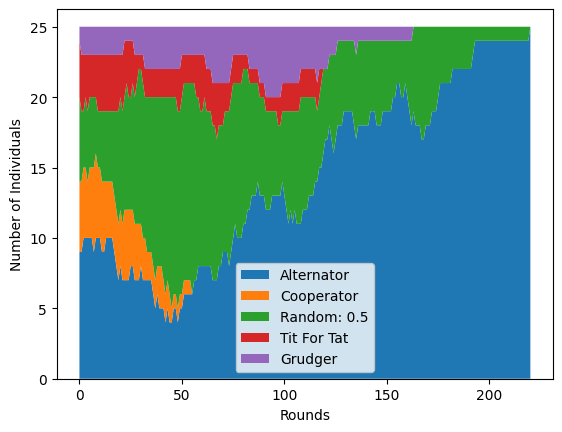

In [58]:
# Plot the results

player_names = mp.populations[0].keys()

plot_data = []
labels = []
for name in player_names:
    labels.append(name)
    values = [counter[name] for counter in mp.populations]
    plot_data.append(values)
    domain = range(len(values))

plt.stackplot(domain, plot_data, labels=labels)
plt.legend()
plt.xlabel("Rounds")
plt.ylabel("Number of Individuals")
plt.show()

#### f) Wealth distribution
Another potential application of competitive games could be in the economic sector. Here we will create a set of companies, which bahavior will be defined by one of the Axelrod strategies. These companies will then interact with one another by playing Axelrod matches, with their wealth being adjusted based on the outcomes of these interactions.

Define the interact function for each company which is basically simulationg a match between 2 strategies, getting the outcome for both companies using `final_score()` and adjust `self.wealth` and `other.wealth` based on the outcome. Please, ensure that none of the companies' wealth falls below 0. 

Wealth should be adjusted like this:

$ wealth_1 = wealth_1 + ((score_1 - score_2) * 10) $

In [83]:
class Company:
    def __init__(self, strategy, initial_wealth=500):
        self.strategy = strategy  # Axelrod strategy
        self.wealth = initial_wealth

    def interact(self, other):
        # Simulate a round of interaction (Axelrod match) between two companies
        match = axl.Match((self.strategy, other.strategy))
        # Play the match
        match.play()
        
        # Get the outcome of the match via `final_score()`
        self_score, other_score = match.final_score()
        
        # Adjust wealth based on the match outcome
        # Ensure wealth does not go below 0!

        delta = (self_score - other_score) * 10
        self.wealth = max(0, self.wealth + delta)
        other.wealth = max(0, other.wealth - delta)
        

#### g) Wealth simulation
Now that we have a function for calculating the interaction between companies, we can run the simulation. Initialize a population of companies with size 10 with different strategies that were randomly selected from the `strategies` pool.

In [86]:
# Select a subset of Axelrod strategies
strategies = [axl.TitForTat, axl.Cooperator, axl.Grudger, axl.Alternator, axl.Random]

# Initialize the population of companies with different strategies; companies should be of size 10
companies = []
for _ in range(10):
    strategy = random.choice(strategies)
    companies.append(Company(strategy()))


# Run the simulation
for _ in range(10):  # Number of turns
    random.shuffle(companies)
    for i in range(0, len(companies), 2):  # Pair up companies to interact
        companies[i].interact(companies[i+1])

# Aggregate wealth by strategy
strategy_wealth = defaultdict(int)
for company in companies:
    strategy_name = type(company.strategy).__name__
    strategy_wealth[strategy_name] += company.wealth

Let's see the total distribution of wealth after our simulation.

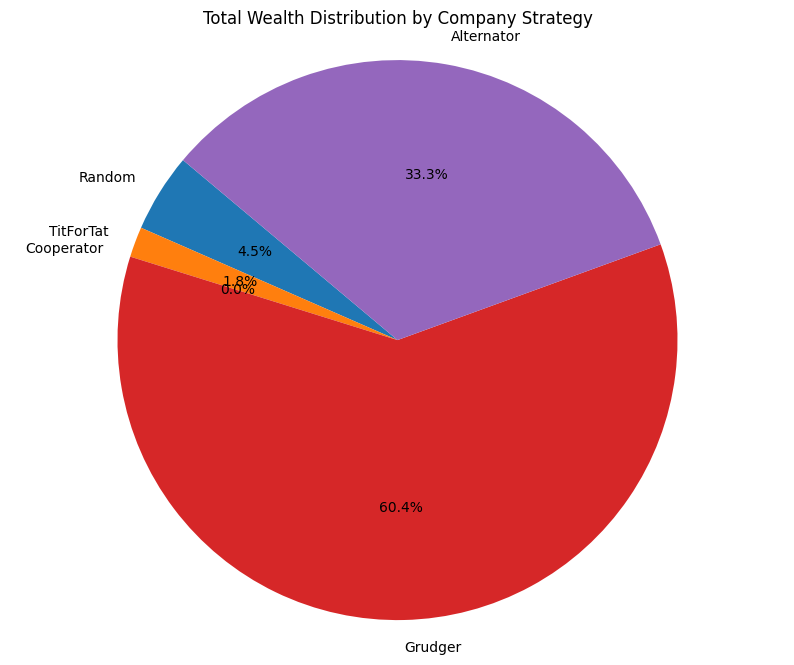

In [87]:
# Prepare data for the pie chart
labels = list(strategy_wealth.keys())
sizes = list(strategy_wealth.values())

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Wealth Distribution by Company Strategy')
plt.show()

Analyze the wealth distribution among company strategies in the pie chart. Which strategies perform best or worst, and why might this be the case?

**Write your observations here:**

The pie chart shows that Grudger is the most successful strategy, earning the most wealth. It works well because it cooperates at first but punishes anyone who defects and never forgives, so it earns a lot with honest strategies and protects itself from being used by selfish ones.

Alternator comes second. It switches between cooperating and defecting every turn. This helps it sometimes take advantage of naïve strategies like Cooperator and confuse reactive ones like Tit For Tat. But it also loses badly against strict strategies like Grudger.

Cooperator does the worst. It always cooperates, even with strategies that take advantage of it. Since it never punishes or defends itself, it keeps losing wealth over time.

In short, the best strategies are those that know how to cooperate, but also know when to punish others if needed.

## Task 6.2 - Cooperative Games

Cooperative games are those in which players work with one another in order to achieve a common objective. The goal of a cooperative game is to reduce emphasis on competition and increase emphasis on the social aspects of working in teams and groups.

The Gale-Shapley algorithm, often associated with the solution to the stable marriage problem, has a significant connection to cooperative game theory. This connection lies in the algorithm's ability to find stable matches between two sets of participants, ensuring that no individual has an incentive to deviate from their match if it means forming a more preferred pairing.

In the context of cooperative game theory, a game is defined by the players involved and the payoffs or outcomes each player receives based on the various possible coalitions. A key concept in cooperative games is the notion of stability. This refers to how coalitions (or matches, in the context of the Gale-Shapley algorithm) are formed. Stability ensures that no subset of players would prefer to break away and form their own coalition because they would achieve a better outcome.

The task involves employing the Gale-Shapley algorithm, commonly known in the context of stable marriage and college admissions problems. Here, the algorithm will have a creative and socially impactful purpose: to facilitate new friendships through meetups among users of a dating app, leveraging shared interests and logistical compatibility. Please be aware that we won't use any personal information here and we will not take sex and orientation into account, since we will create friend-matches.

For our purposes, we will make use of the existing [dataset](https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles)[7] from the dating app OkCupid.
The original dataset was slightly modified to contain 4 extra columns: city, state, likes_dogs, likes_pets for easier manipulations later on.

#### a) Dataset OkCupid
Please, read the dataset "okcupid_profiles.csv" and save it as `profiles`.

In [62]:
# Read the dataset
profiles = pd.read_csv("okcupid_profiles.csv")

df = profiles.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         59946 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

We see that our dataset has 35 columns and 59946 entries. The columns in the dataframe are:

`age, status, sex, orientation, body_type, diet, drinks, drugs, education, ethnicity, height, income, job, last_online, location, offspring, pets, religion, sign, smokes, speaks, id, city, state, likes_dogs, likes_cats`
as well as 10 long response answers to given prompts:
- `essay0`: My self summary
- `essay1`: What I’m doing with my life
- `essay2`: I’m really good at
- `essay3`: The first thing people usually notice about me
- `essay4`: Favorite books, movies, show, music, and food
- `essay5`: The six things I could never do without
- `essay6`: I spend a lot of time thinking about
- `essay7`: On a typical Friday night I am
- `essay8`: The most private thing I am willing to admit
- `essay9`: You should message me if…

Here we assign the weights to common interests to get 10 possible results of similarity. We assigned the importance of the similarity as 1 for the whole location containing both city and state, 0.8 if only the state matches, 0.7 if they have at least one common language and 0.3 for (dis)liking pets. You can adjust them if you want. This way we get the following permutations:
1. **2** if location, common language and common pets interest match - best match possible
2. **1.7** if they have the same location and a common language to communicate
3. **1.5** if state and language match
4. **1.3** if the location and pets preference match
5. **1.1** if the state and pets preference is the same
6. **1** if only the location match or they have a comon language and share pets preference
7. **0.8** if only state matches
8. **0.7** if the language matches
9. **0.3** of pets preference is the same
10. **0** if nothing is in common

In [63]:
# The importance of the preference similarity for meetup
# [whole location, just state, languages, pets]
weights = [1, 0.8, 0.7, 0.3]

Now we implement the similarity rating calculation:

In [64]:
def calc_similarity(person_1, person_2):
    sim = 0
    if person_1['location'] == person_2['location']:
        sim += weights[0]
    elif person_1['state'] == person_2['state']:
        sim += weights[1]

    languages_1 = set(person_1['speaks'].split(', '))
    languages_2 = set(person_2['speaks'].split(', '))
    if bool(languages_1.intersection(languages_2)):
        sim += weights[2]
        
    if (person_1['likes_dogs'] or person_1['likes_cats']) and (person_2['likes_dogs'] or person_2['likes_cats']):
        sim += weights[3]
    return sim

The [Gale-Shapley algorithm](https://en.wikipedia.org/wiki/Gale%E2%80%93Shapley_algorithm) [8] ensures a stable matching between two sets of entities, where 'stable' means there are no two individuals who would prefer each other over their current match. 
Applying this algorithm for creating meetups considers each participant's location, language, and pet preference to simulate a 'preference' in the context of seeking friendship. 

#### b) Matching implemetation
Complete the `stable_matching` main loop.

Pseudocode for the implementation is as follows
```
Initialize all group_1 and group_2 to be free
while there exist a free person_1
{
    person_2 = person_1's highest ranked preference who wasn't yet considered to match
    if person_2 is free
       (person_2, person_2) become matched
    else some pair (person_1', person_2) already exists
       if person_2 prefers person_2 to person_1'
          (person_1, person_2) become matched
           person_1' becomes free
       else
          (person_1', person_2) remain partners
}
```


In [ ]:
def stable_matching(profiles):
    # Split the sample dataset in half
    group_1 = profiles.head(int(len(profiles)/2))
    group_2 = profiles.tail(int(len(profiles)/2))

    # Init dictionary for meetup matches and preferences to fill out
    partners, prefs_1, prefs_2 = { }, { }, { }

    # Free ids of both groups
    free_1 = set(group_1['id'])
    free_2 = set(group_2['id'])

    for _, person_1 in group_1.iterrows():
        if person_1['id'] not in prefs_1:
            prefs_1[person_1['id']] = {}
        for _, person_2 in group_2.iterrows():
            prefs_1[person_1['id']][person_2['id']] = calc_similarity(person_1, person_2)

    for _, person_2 in group_2.iterrows():
        if person_2['id'] not in prefs_2:
            prefs_2[person_2['id']] = {}
        for _, person_1 in group_1.iterrows():
            prefs_2[person_2['id']][person_1['id']] = calc_similarity(person_1, person_2)

    proposed = {p1_id: set() for p1_id in free_1}

    while free_1:
        person_1_id = free_1.pop()
        person_1_prefs = prefs_1[person_1_id]

        # Sort preferences by similarity descending, and pick first unproposed
        ranked_person_2 = sorted(
            ((p2_id, score) for p2_id, score in person_1_prefs.items() if p2_id not in proposed[person_1_id]),
            key=lambda x: -x[1]
        )

        if not ranked_person_2:
            continue  # No one left to propose to

        person_2_id, _ = ranked_person_2[0]
        proposed[person_1_id].add(person_2_id)

        if person_2_id not in partners:
            partners[person_2_id] = person_1_id
        else:
            current_partner = partners[person_2_id]
            # Compare preferences from person_2's perspective
            if prefs_2[person_2_id][person_1_id] > prefs_2[person_2_id][current_partner]:
                partners[person_2_id] = person_1_id
                free_1.add(current_partner)
            else:
                free_1.add(person_1_id)

    return partners


Try out the algorithm! Use the Gale-Shapley algorithm to match individuals for platonic meetups based on shared interests and previously defined similarity criteria.

#### c) Applying `stable_matching`
Get random sample of 150 people from the dataset as `df_sampled` and apply `stable_matching` function to generate `matches`

In [98]:
# Get random sample of 150 people from dataset
df_sampled = df.sample(n = 150, random_state=42)


# Apply the Gale-Shapley algorithm on the sampled dataset
matches = stable_matching(df_sampled)


# Count the number of matches
num_matches = sum(1 for p_id in matches.values() if p_id is not None)

# Print the results
print(f"Number of matches found: {num_matches}")

Number of matches found: 75


#### Now visualize the matches! Answer the questions down below.

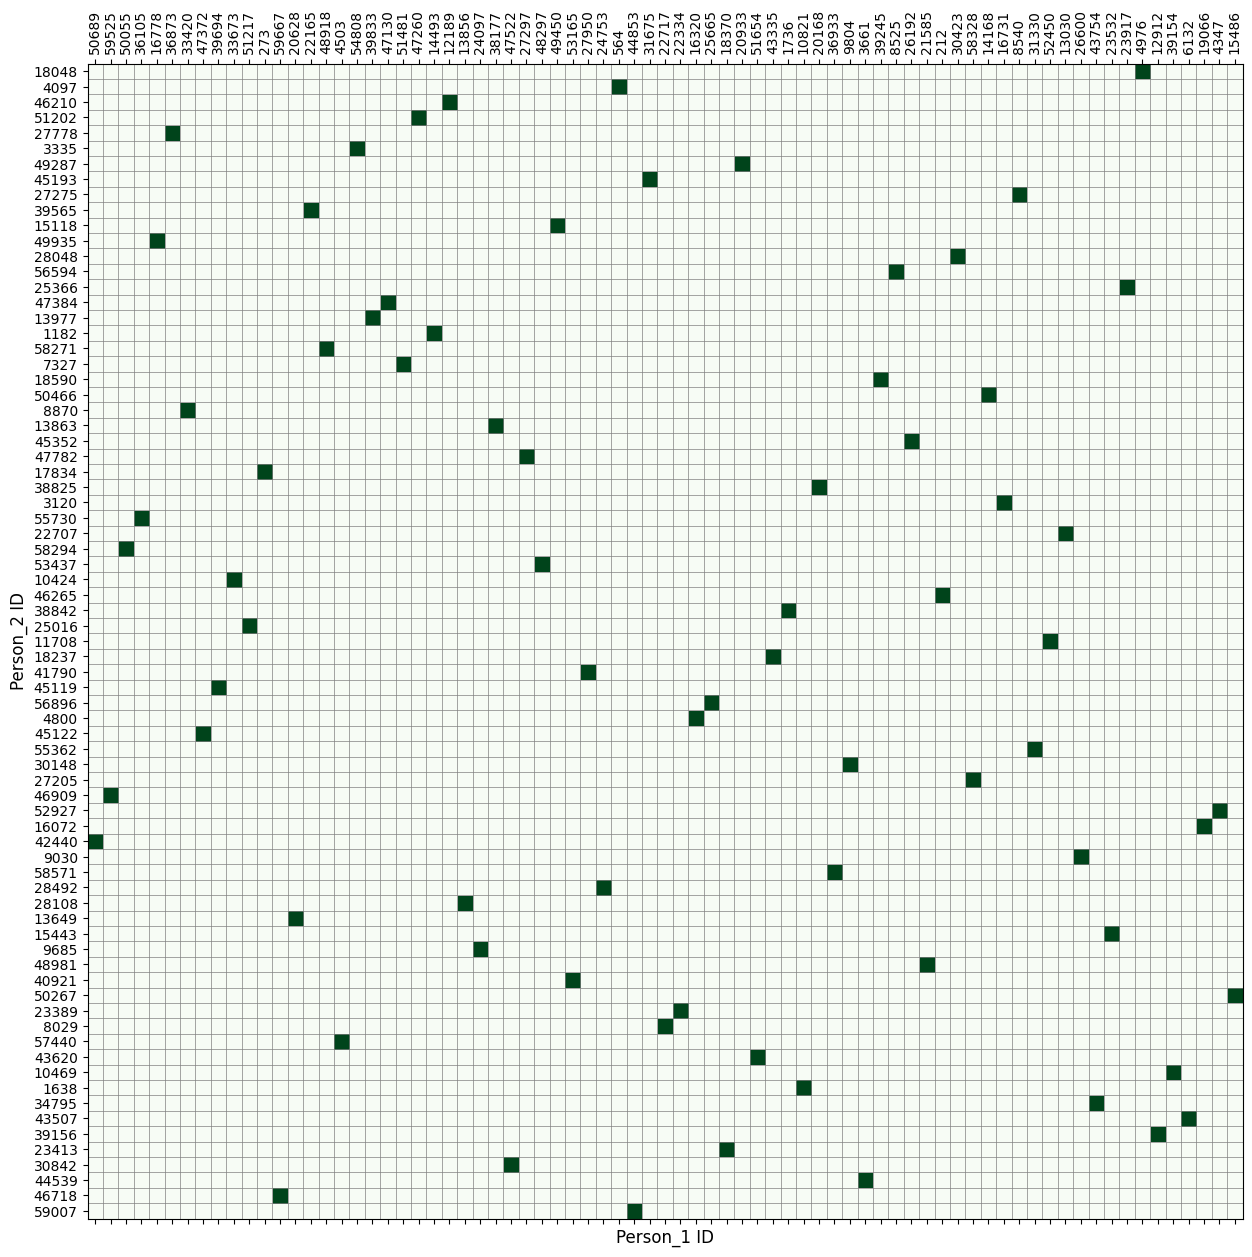

In [99]:
# Filter out unmatched individuals (where value is not None)
filtered_matches = {k: v for k, v in matches.items() if v is not None}

propose_ids = list(filtered_matches.keys())
unique_propose_ids = list(set(propose_ids))
match_ids = list(filtered_matches.values())
unique_match_ids = list(set(match_ids))

# Create an index mapping for the IDs
propose_id_index = {id: idx for idx, id in enumerate(unique_propose_ids)}
match_id_index = {id: idx for idx, id in enumerate(unique_match_ids)}

# Initialize the matrix
propose_matrix_size = len(unique_propose_ids)
match_matrix_size = len(unique_match_ids)
matrix = np.zeros((propose_matrix_size, match_matrix_size))

# Populate the matrix
for person, match in filtered_matches.items():
    person_idx, match_idx = propose_id_index[person], match_id_index[match]
    matrix[person_idx, match_idx] = 1

fig, ax = plt.subplots(figsize=(15, 15))
cax = ax.matshow(matrix, cmap='Greens')

# Set ticks and labels
ax.set_xticks(np.arange(propose_matrix_size))
ax.set_yticks(np.arange(match_matrix_size))
ax.set_xticklabels(unique_propose_ids, rotation=90, fontsize=10)
ax.set_yticklabels(unique_match_ids, fontsize=10)

# Enable grid
ax.set_xticks(np.arange(-.5, propose_matrix_size, 1), minor=True)
ax.set_yticks(np.arange(-.5, match_matrix_size, 1), minor=True)
ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)

plt.xlabel("Person_1 ID", fontsize=12)
plt.ylabel("Person_2 ID", fontsize=12)

plt.show()

#### d) Answer the following questions
1. We remove 1 match post hoc (after the algorithm has run) from sample dataset. Will the resulting matches change?
2. We add 2 extra participants to our sampled dataset here. Will the matches change?

**Write your observations here:**
1) No, once the algorithm has run, the matching is fixed. Removing a pair manually does not affect the other matches, unless the algorithm is rerun.
2) Yes, adding participants before running the algorithm changes the set of preferences and possible pairings, so the resulting stable matching can differ.

### Feedback

We're always looking for improvements. Please share your feedback; tell us where you had difficulties or what you’d change to make things better.

**Note:** All feedback will be saved anonymous, so feel free to be open and honest!

**Please write your feedback here:**

### References

- [1] <https://cs.stanford.edu/people/eroberts/courses/soco/projects/1998-99/game-theory/axelrod.html>
- [2] <https://plato.stanford.edu/entries/prisoner-dilemma/>
- [3] <https://archive.org/details/prisonersdilemma00poun/page/n7/mode/2up>
- [4] <https://pub.dss.in.tum.de/brandt-research/nash.pdf>
- [5] <https://economics.utoronto.ca/osborne/2x3/tutorial/PEFRM.HTM>
- [6] <https://axelrod.readthedocs.io/en/stable/index.html?highlight=axelrod>
- [7] <https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles>
- [8] <https://en.wikipedia.org/wiki/Gale%E2%80%93Shapley_algorithm>